# A. Data Cleaning and Basic Data Exploration

In [1]:
## Load libraries
import pandas as pd
from pandas import read_csv

In [2]:
filename = 'Bank.csv'

In [3]:
bank = pd.read_csv(filename, encoding='ISO-8859-1')

In [4]:
bank.shape

(4499, 17)

In [5]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4499 entries, 0 to 4498
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Age                  4499 non-null   int64 
 1   Experience           4499 non-null   int64 
 2   Income               4499 non-null   int64 
 3   Branch Address       4499 non-null   object
 4   Family               4499 non-null   int64 
 5   CCAvg                4499 non-null   object
 6   Mortgage             4499 non-null   int64 
 7   Personal Loan        4499 non-null   int64 
 8   Brokerage Account    4499 non-null   int64 
 9   GIC Account          4499 non-null   int64 
 10  Online               4499 non-null   int64 
 11  CreditCard           4499 non-null   int64 
 12  Advisor Name         4499 non-null   object
 13  Advisor Designation  4499 non-null   object
 14  Branch Address 1     4499 non-null   object
 15  Branch Address 2     4499 non-null   object
 16  Branch

In [6]:
bank.head()

,Age,Experience,Income,Branch Address,Family,CCAvg,Mortgage,Personal Loan,Brokerage Account,GIC Account,Online,CreditCard,Advisor Name,Advisor Designation,Branch Address 1,Branch Address 2,Branch Address 3
0,50,24,11,234 Blue Spring Rd.,4,0.6,0,0,0,0,0,1,Carolin Whitmire,PFP,234 Blue Spring Rd.,533 Hillcrest Street,94 Country Club St.
1,31,7,173,218 S. Westport Court,1,6,0,0,0,0,1,0,Marylee Bristow,PFP,218 S. Westport Court,9587 SW. Jefferson Street,9670 Wilson Rd.
2,41,16,10,9834 East Pineknoll Ave.,2,0.3,0,0,0,0,1,0,Corazon Eastin,PFP,336 Pin Oak Ave.,9834 East Pineknoll Ave.,742 Bridle Street
3,53,27,44,7330 West Grand St.,4,1.5,0,0,0,0,0,0,Beatriz Rolf,PFP,7330 West Grand St.,91 Lake Court,7041 East Mammoth Drive
4,29,5,33,36 Kent Court,1,1.8,78,0,0,0,1,0,Zofia Rambo,PFP,40 E. Dunbar Ave.,36 Kent Court,69 Spruce Dr.


In [7]:
## Re-name columns
names = ['Age','Exp','Income','BAdd','Family','CCAvg','Mortgage','PerLoan','BroAcc','GICAcc','Online','CreditCard','Advisor','Designation','BAdd1','BAdd2','BAdd3']

In [8]:
## Re-read the file
bank = pd.read_csv(filename, names=names,header=0, encoding='ISO-8859-1')

In [9]:
bank.shape

(4499, 17)

In [10]:
## Drop rows with NA values
bankclean = bank.dropna()

In [11]:
## Drop rows with -1,-2,-3 years of experience
bank1 = bankclean[bankclean.Exp != -1]
bank2 = bank1[bank1.Exp != -2]
bank3 = bank2[bank2.Exp != -3]

In [12]:
## Drop CCAvg with non-float: 2,00
bank_CCAvg_float = bank3[bank3.CCAvg != '2,00']

In [13]:
## Convert CCAvg to float
bank_CCAvg_float['CCAvg'] = bank_CCAvg_float['CCAvg'].astype(float)

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [14]:
## Creat a new Column & Convert CCAvg into year & in thousands
bankCCAvgYr = bank_CCAvg_float.assign(CCAvgYr = bank_CCAvg_float.CCAvg)
bankCCAvgYr.CCAvgYr *=12000

## Creat a new Column & Convert Mortaage in thousands
MortgageThousand = bankCCAvgYr.assign(MortgageT = bankCCAvgYr.Mortgage)
MortgageThousand.MortgageT *= 1000
MortgageThousand

## Creat a new Column & Income in thousands
bankIncomeYr = MortgageThousand.assign(IncomeYr = bank3.Income)
bankIncomeYr.IncomeYr *=1000

In [15]:
## Drop Income < CreditCard 
bank = bankIncomeYr[bankIncomeYr['CCAvgYr'] <= bankIncomeYr['IncomeYr']]

# B. Exploratory Data Analysis

In [16]:
## Load libraries
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [17]:
## select dataset I want to explore (ignore variables containing text)
dataset = bank[['Age','Exp','Family', 
                'PerLoan', 'BroAcc','GICAcc','Online','CreditCard',
                'IncomeYr','CCAvgYr','MortgageT']]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2127685278>,
      dtype=object)

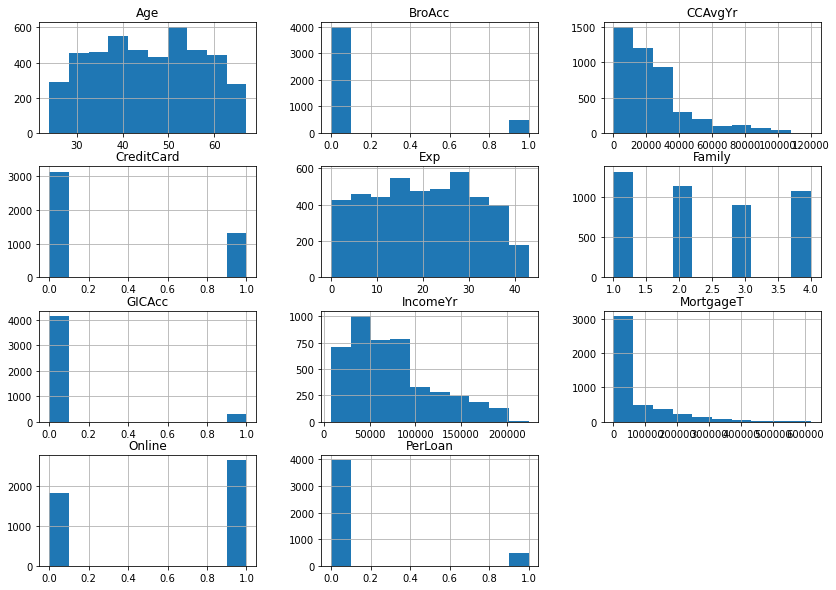

In [18]:
## Histogram
dataset.hist(figsize=(14,10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2126a24c18>,
      dtype=object)

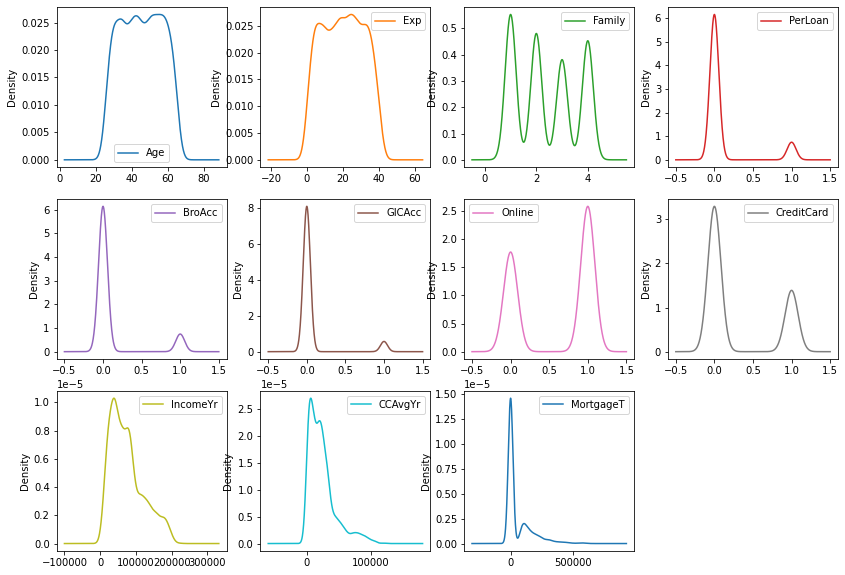

In [19]:
## Density plot
dataset.plot(figsize=(14,10),kind='density',subplots=True,layout=(3,4),sharex=False,sharey=False)

[Text(0, 0, 'Age'),
 Text(0, 0, 'Exp'),
 Text(0, 0, 'Family'),
 Text(0, 0, 'PerLoan'),
 Text(0, 0, 'BroAcc'),
 Text(0, 0, 'GICAcc'),
 Text(0, 0, 'Online'),
 Text(0, 0, 'CreditCard'),
 Text(0, 0, 'IncomeYr'),
 Text(0, 0, 'CCAvgYr'),
 Text(0, 0, 'MortgageT')]

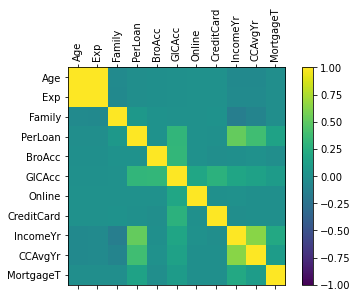

In [20]:
## Plot correlation matrix
## Relations between each variable
correlations = dataset.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)

## change the tick labels
ticks = range(0,11,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
numeric_columns = dataset.select_dtypes(include='number')
ax.set_xticklabels(numeric_columns, rotation=90)
ax.set_yticklabels(numeric_columns)
    ##PerLoan has + correlation with GICAcc,IncomeYr,CCAvgYr

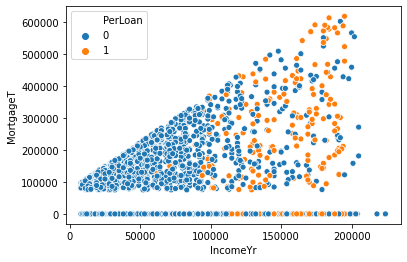

In [21]:
## Scatter Plot - Personal Loan: Income VS. Mortgage
sns.scatterplot(x='IncomeYr', y='MortgageT', hue='PerLoan', data=dataset)

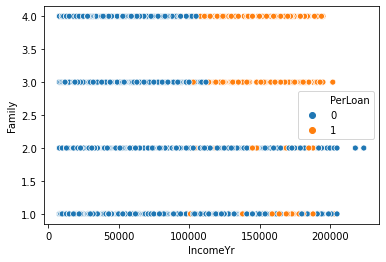

In [22]:
## Scatter Plot - Personal Loan: Family Size VS. Income
sns.scatterplot(x='IncomeYr', y='Family', hue='PerLoan', data=dataset)

In [23]:
## Split Customers have or does not have Personal Loan
PLoanOwner = dataset[dataset.PerLoan == 1] # 480 customers 
PLoanTarget = dataset[dataset.PerLoan != 1] # 3965 customers 

In [24]:
## Normalize GIC: for Customer have Personal Loan 
PLoanOwner['GICAcc'].value_counts(normalize=True)*100

0    70.833333
1    29.166667
Name: GICAcc, dtype: float64

In [25]:
## Normalize GIC: for Customer does not have Personal Loan
PLoanTarget['GICAcc'].value_counts(normalize=True)*100

0    96.166456
1     3.833544
Name: GICAcc, dtype: float64

Text(0.5, 1.0, "Personal Loan Owner's GIC Infomation")

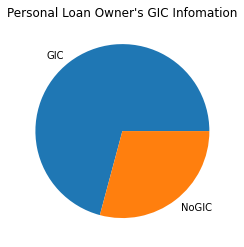

In [26]:
## Personal Loan Owner's GIC Infomation
PLoanOwnerPie = ['GIC','NoGIC']
PLoanOwnerPieData = [70.83,29.17]

fig = plt.figure(figsize =(6, 4))
plt.pie(PLoanOwnerPieData, labels = PLoanOwnerPie)
plt.title("Personal Loan Owner's GIC Infomation")

Text(0.5, 1.0, "Personal Loan Target Customer's GIC Infomation")

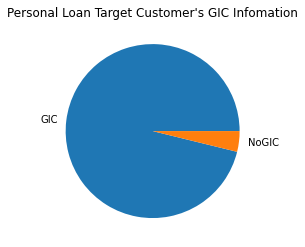

In [27]:
##Personal Loan Target Customer's GIC Infomation
PLoanTargetPie = ['GIC','NoGIC']
PLoanTargetPieData = [96.166,3.833]

fig = plt.figure(figsize =(6, 4))
plt.pie(PLoanTargetPieData, labels = PLoanTargetPie)
plt.title("Personal Loan Target Customer's GIC Infomation")

# C. Business Analytics

In [28]:
advisor = bank[['Advisor','PerLoan','GICAcc','CreditCard','IncomeYr']]
advisor.head()

,Advisor,PerLoan,GICAcc,CreditCard,IncomeYr
0,Carolin Whitmire,0,0,1,11000
1,Marylee Bristow,0,0,0,173000
2,Corazon Eastin,0,0,0,10000
3,Beatriz Rolf,0,0,0,44000
4,Zofia Rambo,0,0,0,33000


In [29]:
advisor.shape

(4445, 5)

In [30]:
# Key column: "Advisor", which I want to gorup data
by_advisor = advisor.groupby('Advisor') 

In [31]:
## Advisor with most number of client 
count_advisor = by_advisor['PerLoan'].count() 
#count_advisor.sort_values() # max=108

In [32]:
## Advisor with most number of Personal Loan Client 
advisor_PLoan = advisor.groupby('Advisor')['PerLoan'].sum()
#advisor_PLoan.sort_values() # max=16

In [33]:
## Advisor's Customer with sum of highest Income 
advisor_Income = advisor.groupby(['Advisor'])['IncomeYr'].sum()
#advisor_Income.sort_values() # max Income Sum = 8,388,000

# D. Machine Learning

In [34]:
## Load more libraries
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [35]:
dataset = pd.read_csv('Bank.csv')

In [36]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4499 entries, 0 to 4498
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Age                  4499 non-null   int64 
 1   Experience           4499 non-null   int64 
 2   Income               4499 non-null   int64 
 3   Branch Address       4499 non-null   object
 4   Family               4499 non-null   int64 
 5   CCAvg                4499 non-null   object
 6   Mortgage             4499 non-null   int64 
 7   Personal Loan        4499 non-null   int64 
 8   Brokerage Account    4499 non-null   int64 
 9   GIC Account          4499 non-null   int64 
 10  Online               4499 non-null   int64 
 11  CreditCard           4499 non-null   int64 
 12  Advisor Name         4499 non-null   object
 13  Advisor Designation  4499 non-null   object
 14  Branch Address 1     4499 non-null   object
 15  Branch Address 2     4499 non-null   object
 16  Branch

In [37]:
## Drop the num-number object
dataset = dataset[dataset.CCAvg != '2,00']

In [38]:
## Convert 'Credit Card Average' into float
dataset['CCAvg'] = dataset['CCAvg'].astype(float)

In [39]:
## Drop: Addresses & Advisor Name
dataset.drop(columns=["Branch Address", "CCAvg",'Advisor Name','Branch Address 1','Branch Address 2','Branch Address 3'], inplace=True)

In [40]:
dataset

,Age,Experience,Income,Family,Mortgage,Personal Loan,Brokerage Account,GIC Account,Online,CreditCard,Advisor Designation
0,50,24,11,4,0,0,0,0,0,1,PFP
1,31,7,173,1,0,0,0,0,1,0,PFP
2,41,16,10,2,0,0,0,0,1,0,PFP
3,53,27,44,4,0,0,0,0,0,0,PFP
4,29,5,33,1,78,0,0,0,1,0,PFP
...,...,...,...,...,...,...,...,...,...,...,...
4494,57,33,43,1,0,0,0,0,0,0,PFP
4495,62,37,19,3,89,0,0,0,0,0,PFP
4496,29,3,53,4,0,0,0,0,1,0,PFP
4497,42,18,43,1,136,0,0,0,0,0,PFP


In [41]:
## get values of dataframe
array = dataset.values
print(array)

[[50 24 11 ... 0 1 'PFP']
 [31 7 173 ... 1 0 'PFP']
 [41 16 10 ... 1 0 'PFP']
 ...
 [29 3 53 ... 1 0 'PFP']
 [42 18 43 ... 0 0 'PFP']
 [60 34 38 ... 0 0 'PFP']]


In [42]:
## Set values except Personal Loan into X 
X = array[:,0:10]
X

array([[50, 24, 11, ..., 0, 0, 1],
       [31, 7, 173, ..., 0, 1, 0],
       [41, 16, 10, ..., 0, 1, 0],
       ...,
       [29, 3, 53, ..., 0, 1, 0],
       [42, 18, 43, ..., 0, 0, 0],
       [60, 34, 38, ..., 0, 0, 0]], dtype=object)

In [43]:
## Set Personal Loan into Y
y = array[:,-1] 
y

array(['PFP', 'PFP', 'PFP', ..., 'PFP', 'PFP', 'PFP'], dtype=object)

In [44]:
# Prepare Data: Training and Test Data
# Split off test dataset
# 1/4 of the data will be used for testing # test size = 25%
test_size = 0.25 
seed = 7

# select 1/4 randomly and split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size,random_state=seed)

    # train =75%, test=25%
print(X_train)
print(y_train)
print(X_test)
print(y_test)

[[57 27 55 ... 0 1 0]
 [39 14 10 ... 0 0 1]
 [63 37 42 ... 0 1 0]
 ...
 [62 36 119 ... 0 0 0]
 [59 33 93 ... 0 0 0]
 [46 20 114 ... 0 1 1]]
['CFP' 'PFP' 'PFP' ... 'CFP' 'PFP' 'PFP']
[[50 26 148 ... 0 1 0]
 [49 23 41 ... 0 1 0]
 [55 29 94 ... 0 0 0]
 ...
 [45 20 89 ... 0 1 0]
 [35 11 90 ... 0 0 0]
 [38 13 119 ... 0 0 0]]
['PFP' 'CFP' 'PFP' ... 'PFP' 'PFP' 'PFP']


In [45]:
# Algorithms
models = []
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

In [46]:
# evaluate each model in turn
results = []
names = []
for name, model in models:
    # define how to split off validation data
    kfold = KFold(n_splits=10, shuffle=True)
    # train the model
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LDA: 0.754824 (0.022385)
KNN: 0.707969 (0.014240)
CART: 0.613087 (0.039769)
NB: 0.754827 (0.026250)
SVM: 0.754808 (0.017566)


[array([0.74556213, 0.77810651, 0.71893491, 0.70919881, 0.77744807,
       0.75964392, 0.76261128, 0.75964392, 0.77151335, 0.76557864]), array([0.70710059, 0.72189349, 0.71597633, 0.70326409, 0.72403561,
       0.71810089, 0.69139466, 0.70326409, 0.71810089, 0.67655786]), array([0.63905325, 0.66863905, 0.5887574 , 0.61721068, 0.62611276,
       0.61127596, 0.62017804, 0.56676558, 0.66172107, 0.53115727]), array([0.74852071, 0.75147929, 0.73372781, 0.76854599, 0.70326409,
       0.72700297, 0.78931751, 0.76557864, 0.77151335, 0.78931751]), array([0.76035503, 0.78698225, 0.74852071, 0.75964392, 0.73590504,
       0.76854599, 0.72997033, 0.73590504, 0.74777448, 0.77448071])]


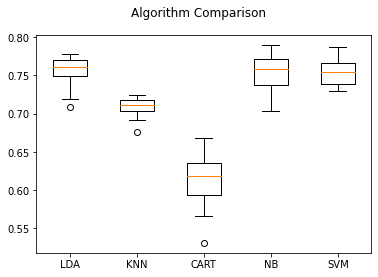

In [47]:
# Compare Algorithms
print(results)

fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [48]:
# Make predictions on test dataset
# instantiate learning model
LDA = DecisionTreeClassifier()

In [49]:
# fitting the model
LDA.fit(X_train, y_train)

DecisionTreeClassifier()

In [50]:
# predict the response
predictions = LDA.predict(X_test)

In [51]:
print(y_test)

['PFP' 'CFP' 'PFP' ... 'PFP' 'PFP' 'PFP']


In [52]:
# evaluate accuracy
print(accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

0.5804444444444444
[[ 63 223]
 [249 590]]
              precision    recall  f1-score   support

         CFP       0.20      0.22      0.21       286
         PFP       0.73      0.70      0.71       839

    accuracy                           0.58      1125
   macro avg       0.46      0.46      0.46      1125
weighted avg       0.59      0.58      0.59      1125

